In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('train.csv')
df.head()


,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [3]:
df.shape


(38932, 5)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [5]:
df['Is_Response'].value_counts()


happy        26521
not happy    12411
Name: Is_Response, dtype: int64

In [6]:
df.isnull().sum()


User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

In [8]:
import matplotlib.pyplot as plt


In [11]:
print(round(df['Is_Response'].value_counts(normalize=True)*100,2))


happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


<AxesSubplot:>

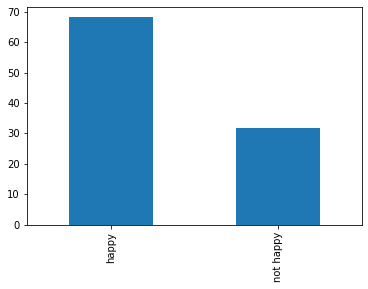

In [12]:
round(df['Is_Response'].value_counts(normalize=True)*100,2).plot(kind='bar')

In [13]:
df


,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
...,...,...,...,...,...
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy


In [15]:
df.drop(columns=['User_ID','Browser_Used','Device_Used'],inplace=True)


In [16]:
df


,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy
...,...,...
38927,We arrived late at night and walked in to a ch...,happy
38928,The only positive impression is location and p...,not happy
38929,Traveling with friends for shopping and a show...,not happy
38930,The experience was just ok. We paid extra for ...,not happy


In [17]:
import re


In [18]:
def clean_text(text):
    text=text.lower()
    text=re.sub('[^a-zA-Z]',' ',text)
    text=re.sub('[^\w\s]',' ',text)
    return text

cleaned1= lambda x: clean_text(x)


In [19]:
df['NewCleanedText']=pd.DataFrame(df['Description'].apply(cleaned1))


In [20]:
df


,Description,Is_Response,NewCleanedText
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april ...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
...,...,...,...
38927,We arrived late at night and walked in to a ch...,happy,we arrived late at night and walked in to a ch...
38928,The only positive impression is location and p...,not happy,the only positive impression is location and p...
38929,Traveling with friends for shopping and a show...,not happy,traveling with friends for shopping and a show...
38930,The experience was just ok. We paid extra for ...,not happy,the experience was just ok we paid extra for ...


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df['NewCleanedText'],df['Is_Response'],test_size=0.2)


In [27]:
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

31145
7787
31145
7787


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


In [31]:
tfidf=TfidfVectorizer()
logreg=LogisticRegression()


In [32]:
from sklearn.pipeline import Pipeline


In [33]:
model=Pipeline([('vectorizer',tfidf),('classifier',logreg)])


In [34]:
model.fit(X_train,Y_train)


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score


In [36]:
predictions=model.predict(X_test)


In [37]:
conf_m=confusion_matrix(predictions,Y_test)


In [38]:
acc=accuracy_score(predictions,Y_test)
print(conf_m)
print(acc)


[[4957  548]
 [ 333 1949]]
0.8868627199178117


In [39]:
example=['Im satisfied with the food']
print(model.predict(example))


['happy']
